In [7]:
# Punto 1 Dataset
# https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download

In [8]:
# Punto 2
import pandas as pd
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [12]:
df.duplicated().sum()

165

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length
La variable dependiente sería:

loan_status

La variable "loan_status" es la que queremos predecir: si el préstamo resultará en incumplimiento (1) o no (0).
Fin punto 2

In [13]:
# Punto 3 , 4 y 5
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)


In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Decidi eliminar los nulos por qué son un % relativamente comparado con la magnitud de los datos

In [16]:
df['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

In [17]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [18]:
df.reset_index(inplace = True)

La edad maxima es 144 años en person_age y la duración del empleo de una persona tiene un valor de 123 que también es muy poco probable entonces decido eliminar esos valores

In [19]:
(df['person_age'].value_counts().values>90).sum()
# Elimino las filas que tengan edades de mas de 90

25

In [20]:
df = df.drop(df[df['person_age'] > 90].index, axis=0)


In [21]:
(df['person_age'].value_counts().values>60).sum()

28

In [22]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [23]:
df = df.drop(['index'], axis=1)
df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)

In [24]:
df['person_home_ownership'].value_counts()

RENT        14548
MORTGAGE    11798
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [25]:
# Correlaccion de las variables
df.corr()


<ipython-input-25-3cc9e042728d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.141471,0.176054,0.056061,0.010370,-0.022498,-0.039476,0.877581
person_income,0.141471,1.000000,0.160952,0.324766,-0.003767,-0.167028,-0.297635,0.122787
person_emp_length,0.176054,0.160952,1.000000,0.108390,-0.058263,-0.086486,-0.060099,0.151571
loan_amnt,0.056061,0.324766,0.108390,1.000000,0.145895,0.113363,0.577197,0.045580
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
loan_status,-0.022498,-0.167028,-0.086486,0.113363,0.339307,1.000000,0.379534,-0.015575
loan_percent_income,-0.039476,-0.297635,-0.060099,0.577197,0.123401,0.379534,1.000000,-0.029814
cb_person_cred_hist_length,0.877581,0.122787,0.151571,0.045580,0.015330,-0.015575,-0.029814,1.000000


<ipython-input-26-d010b2d4cb6c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


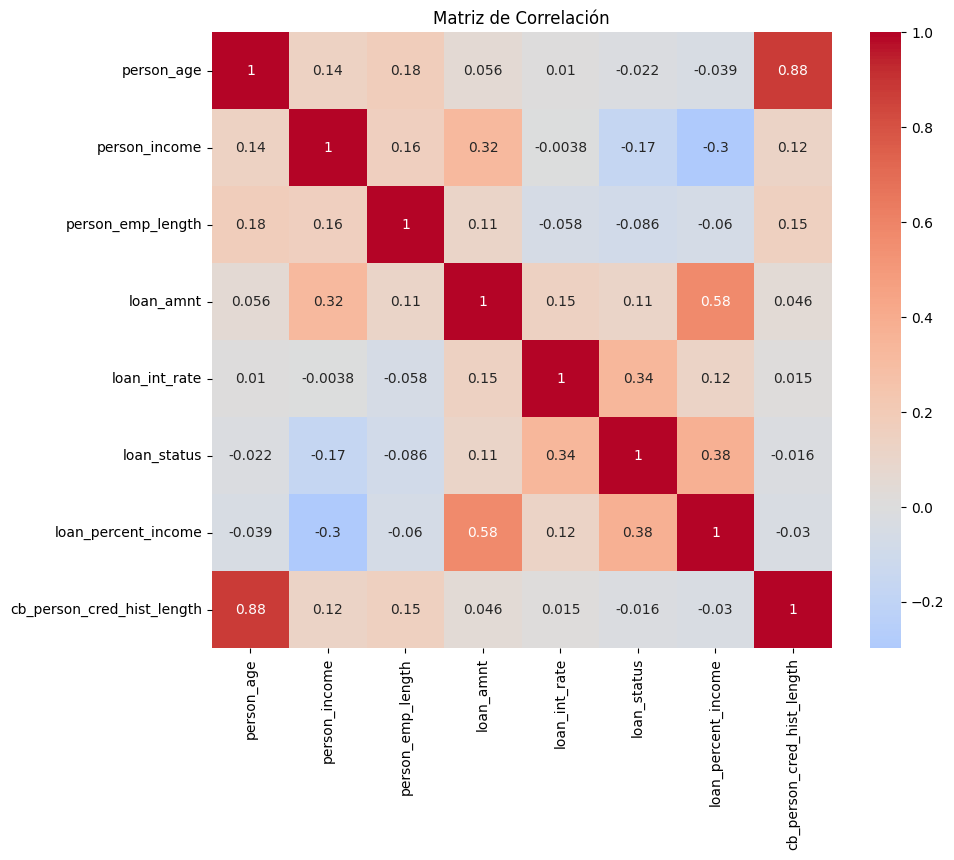

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [27]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


cb_person_cred_hist_length: Esta variable tiene la correlación más fuerte con "loan_status", aunque es importante recordar que la alta correlación no implica necesariamente causalidad. Un valor más alto en "cb_person_cred_hist_length" está correlacionado con valores más bajos en "loan_status", lo que podría sugerir que las personas con una historia crediticia más larga tienen una menor probabilidad de incumplimiento.

person_emp_length: Aunque la correlación no es muy alta, "person_emp_length" muestra una correlación negativa con "loan_status", lo que sugiere que las personas con empleos más largos podrían tener una menor probabilidad de incumplimiento.

loan_int_rate: Esta variable también muestra una correlación positiva con "loan_status", lo que significa que las tasas de interés más altas pueden estar relacionadas con una mayor probabilidad de incumplimiento.

loan_percent_income: La correlación no es muy alta, pero "loan_percent_income" tiene una correlación positiva con "loan_status". Esto podría indicar que préstamos que representan un mayor porcentaje del ingreso de una persona podrían estar relacionados con un mayor riesgo de incumplimiento.

Pero en este caso considero usar todas las variables que proporciona el conjunto de datos para estudiar loan_status ya que podría brindar una visión más completa de la relación entre las características y la variable objetivo. Incluso si algunas variables tienen correlaciones bajas, podrían estar contribuyendo en combinación con otras variables para predecir el resultado.

In [28]:
# Punto 6
from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Divide el conjunto de datos en 80% entrenamiento y 20% pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train y y_train contienen el 80% de los datos para entrenamiento
# X_test y y_test contienen el 20% de los datos para pruebas


In [29]:
# Punto 7
person_home_encoded = pd.get_dummies(df['person_home_ownership'], prefix='home_ownership')
# Esta variable es nominal y no tiene un orden inherente entre las categorías.
loan_intent_encoded = pd.get_dummies(df['loan_intent'], prefix='loan_intent')
# Esta variable es nominal y no tiene un orden inherente entre las categorías.
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade_encoded'] = df['loan_grade'].map(grade_mapping)
# Asignación de Valores Numéricos: Se crea un diccionario de mapeo que asigne a cada categoría una puntuación numérica en función de su orden
default_mapping = {'Y': 1, 'N': 0}
df['cb_person_default_on_file_encoded'] = df['cb_person_default_on_file'].map(default_mapping)
# Dado que esta variable es binaria la codifique usando label encoding
# Elimina las columnas originales
df.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1, inplace=True)

# Concatena las nuevas columnas codificadas al DataFrame
df = pd.concat([df, person_home_encoded, loan_intent_encoded], axis=1)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28632 entries, 0 to 28631
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         28632 non-null  int64  
 1   person_income                      28632 non-null  int64  
 2   person_emp_length                  28632 non-null  float64
 3   loan_amnt                          28632 non-null  int64  
 4   loan_int_rate                      28632 non-null  float64
 5   loan_status                        28632 non-null  int64  
 6   loan_percent_income                28632 non-null  float64
 7   cb_person_cred_hist_length         28632 non-null  int64  
 8   loan_grade_encoded                 28632 non-null  int64  
 9   cb_person_default_on_file_encoded  28632 non-null  int64  
 10  home_ownership_MORTGAGE            28632 non-null  uint8  
 11  home_ownership_OTHER               28632 non-null  uin

In [60]:
# Punto 8
from sklearn.preprocessing import StandardScaler

# Selecciona las características numéricas para la normalización
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma las características numéricas
X_train_normalized = scaler.fit_transform(X_train[numeric_features])
X_test_normalized = scaler.transform(X_test[numeric_features])

# Crea DataFrames con las características normalizadas
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=numeric_features, index=X_train.index)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=numeric_features, index=X_test.index)

# Combina las características normalizadas con las otras características
X_train_final = pd.concat([X_train.drop(numeric_features, axis=1), X_train_normalized_df], axis=1)
X_test_final = pd.concat([X_test.drop(numeric_features, axis=1), X_test_normalized_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

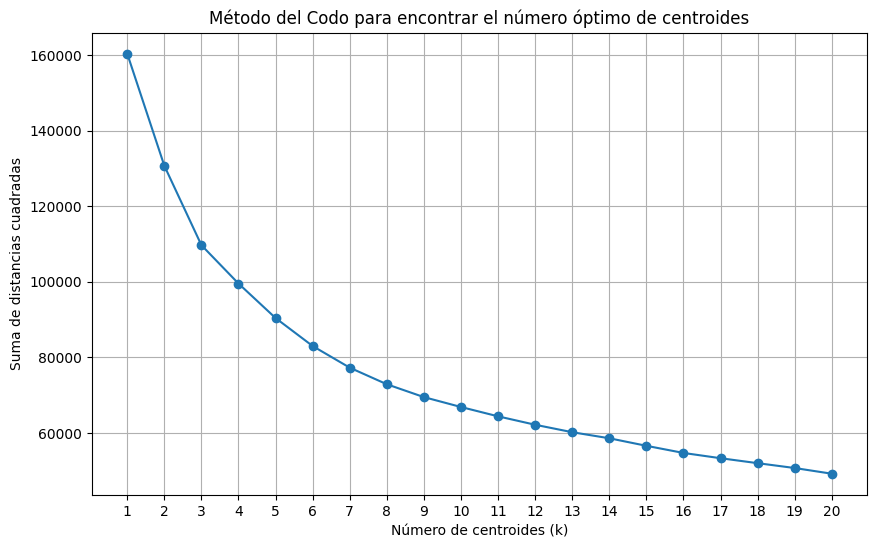

In [61]:
# Punto 9
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir las características para el análisis del número de centroides

# Obtener las características para el análisis
X_for_clustering = X_train_final[features_for_clustering]

# Lista para almacenar las sumas de distancias cuadradas
sse = []

# Probar diferentes valores de k (número de centroides)
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_for_clustering)
    sse.append(kmeans.inertia_)

# Graficar la suma de distancias cuadradas en función de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Número de centroides (k)')
plt.ylabel('Suma de distancias cuadradas')
plt.title('Método del Codo para encontrar el número óptimo de centroides')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
# Use el metodo del codo para definir el número de centroides ya que ese valor de k puede ser una buena estimación del número óptimo de centroides.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

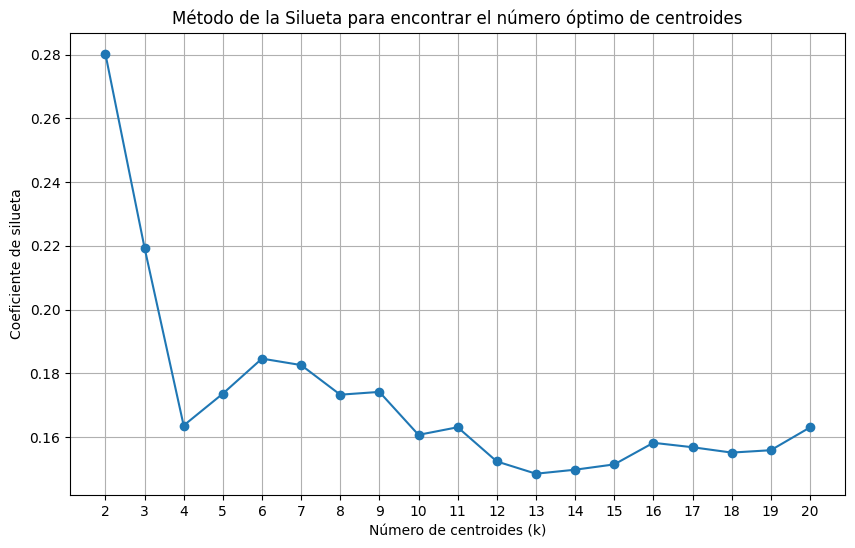

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Obtener las características para el análisis
X_for_clustering = X_train_final[features_for_clustering]

# Estandarizar las características antes de aplicar KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# Lista para almacenar los coeficientes de silueta
silhouette_scores = []

# Probar diferentes valores de k (número de centroides)
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Graficar los coeficientes de silueta en función de k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Número de centroides (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la Silueta para encontrar el número óptimo de centroides')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28632 entries, 0 to 28631
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         28632 non-null  int64  
 1   person_income                      28632 non-null  int64  
 2   person_emp_length                  28632 non-null  float64
 3   loan_amnt                          28632 non-null  int64  
 4   loan_int_rate                      28632 non-null  float64
 5   loan_status                        28632 non-null  int64  
 6   loan_percent_income                28632 non-null  float64
 7   cb_person_cred_hist_length         28632 non-null  int64  
 8   loan_grade_encoded                 28632 non-null  int64  
 9   cb_person_default_on_file_encoded  28632 non-null  int64  
 10  home_ownership_MORTGAGE            28632 non-null  uint8  
 11  home_ownership_OTHER               28632 non-null  uin

In [71]:
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Definir el número de centroides usando KMeans
num_centroids = 3

# Aplicar KMeans para obtener los centroides
kmeans = KMeans(n_clusters=num_centroids, random_state=0)
kmeans.fit(X_train_normalized_df)  # Solo las características numéricas normalizadas
centroids = kmeans.cluster_centers_

# Preparar los datos codificados para el modelo RBFNN
X_train_encoded = kmeans.transform(X_train_normalized_df)
X_test_encoded = kmeans.transform(X_test_normalized_df)

# Definir el modelo RBFNN
rbfnn = MLPClassifier(hidden_layer_sizes=(num_centroids,), activation='logistic', max_iter=1000, learning_rate_init=0.01, tol=1e-7)

# Realizar validación cruzada en el modelo RBFNN
cross_val_scores = cross_val_score(rbfnn, X_train_encoded, y_train, cv=3, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:")
for fold, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: Precisión = {accuracy:.4f}")

# Entrenar el modelo RBFNN con los datos codificados
rbfnn.fit(X_train_encoded, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = rbfnn.predict(X_test_encoded)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo RBFNN:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de validación cruzada:
Fold 1: Precisión = 0.7924
Fold 2: Precisión = 0.8026
Fold 3: Precisión = 0.7971
Precisión del modelo RBFNN: 0.7990221756591583


In [66]:
# Use 2 por que ahi es el punto mas alto del metodo de la silueta
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# 1. Definir el número de centroides usando KMeans
num_centroids = 2

# Aplicar KMeans para obtener los centroides
kmeans = KMeans(n_clusters=num_centroids, random_state=0)
kmeans.fit(X_train_normalized_df)  # Solo las características numéricas normalizadas
centroids = kmeans.cluster_centers_

# Entrenar el modelo RBFNN
rbfnn = MLPClassifier(hidden_layer_sizes=(num_centroids,), activation='logistic', max_iter=1000, learning_rate_init=0.01, tol=1e-7)

# Preparar los datos codificados para el modelo RBFNN
X_train_encoded = kmeans.transform(X_train_normalized_df)

# Realizar validación cruzada en el modelo RBFNN
cross_val_scores = cross_val_score(rbfnn, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:")
for fold, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: Precisión = {accuracy:.4f}")

# Calcular la precisión promedio de la validación cruzada
avg_accuracy = cross_val_scores.mean()
print("Precisión promedio de la validación cruzada:", avg_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de validación cruzada:
Fold 1: Precisión = 0.7776
Fold 2: Precisión = 0.7745
Fold 3: Precisión = 0.7832
Fold 4: Precisión = 0.7776
Fold 5: Precisión = 0.7762
Precisión promedio de la validación cruzada: 0.7778214363676054


In [67]:
# Use 20 por aliatoriedad
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# 1. Definir el número de centroides usando KMeans
num_centroids = 20

# Aplicar KMeans para obtener los centroides
kmeans = KMeans(n_clusters=num_centroids, random_state=0)
kmeans.fit(X_train_normalized_df)  # Solo las características numéricas normalizadas
centroids = kmeans.cluster_centers_

# Entrenar el modelo RBFNN
rbfnn = MLPClassifier(hidden_layer_sizes=(num_centroids,), activation='logistic', max_iter=1000, learning_rate_init=0.01, tol=1e-7)

# Preparar los datos codificados para el modelo RBFNN
X_train_encoded = kmeans.transform(X_train_normalized_df)

# Realizar validación cruzada en el modelo RBFNN
cross_val_scores = cross_val_score(rbfnn, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de validación cruzada:")
for fold, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: Precisión = {accuracy:.4f}")

# Calcular la precisión promedio de la validación cruzada
avg_accuracy = cross_val_scores.mean()
print("Precisión promedio de la validación cruzada:", avg_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados de validación cruzada:
Fold 1: Precisión = 0.8367
Fold 2: Precisión = 0.8389
Fold 3: Precisión = 0.8474
Fold 4: Precisión = 0.8435
Fold 5: Precisión = 0.8448
Precisión promedio de la validación cruzada: 0.8422615149530669


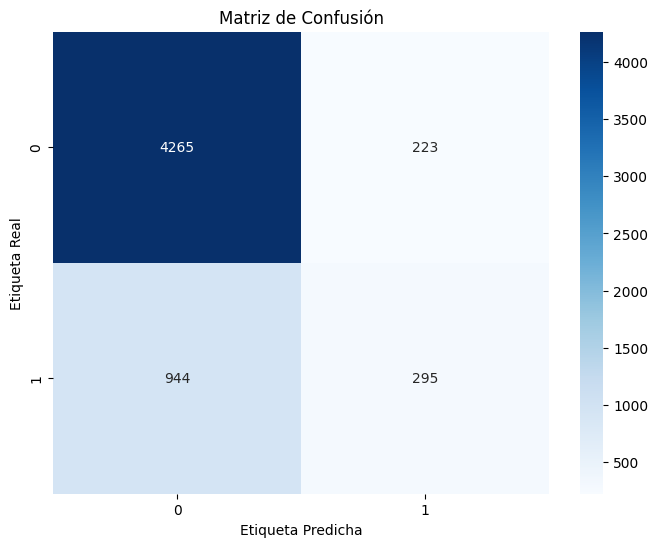

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ajustar el modelo RBFNN en los datos de entrenamiento
rbfnn.fit(X_train_encoded, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred_test = rbfnn.predict(X_test_encoded)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Crear una gráfica de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()



En la matriz de confusión:

Verdadero Positivo (TP): Son los casos en los que el modelo predijo correctamente la clase positiva (verdaderos positivos). En este caso, Tengo 4265 verdaderos positivos.

Verdadero Negativo (TN): Son los casos en los que el modelo predijo correctamente la clase negativa (verdaderos negativos). En la matriz, hay 295 verdaderos negativos.

Falso Positivo (FP): Son los casos en los que el modelo predijo incorrectamente la clase positiva cuando en realidad era negativa. En la matriz, hay 223 falsos positivos.

Falso Negativo (FN): Son los casos en los que el modelo predijo incorrectamente la clase negativa cuando en realidad era positiva. Tengo 944 falsos negativos.